# DATA MANIPULATION WITH PANDAS
Teacher: Richie Cotton | Learning Solutions Architect at DataCamp

Teacher: Maggie Matsui | Senior Content Developer at DataCamp

## Transforming DataFrames

### Methods and attributes

- Pandas
  - Used for Data Manipulation and Data Visualization
  - Built on NumPy (multidimensional array objects - easy data manipulation) and Matplotlib (powerful data visualization capabilities)

- Different ways to represent data
  - Rectangular data = tabular data: normal table with columns (properties) and observations
  
- Python principles for writting a better code: https://www.python.org/dev/peps/pep-0020/


In [ ]:
#Quickly get a sense of the content 

#From methods
table.head() #first 5 rows
table.info() #data types and missing values
table.describe() #statistics - good for numerical

#from attributes
table.shape #number of rows and columns - attribute
table.values #2dimensional numpy array
table.columns #columns names
table.index #row numbers/names

### Sorting and Subsetting

In [ ]:
#methods for SORTING
dogs.sort_values("weight_kg") #ascending (increasing) order - menor para o maior
dogs.sort_values("weight_kg", ascending = False) #decreasing/descending order
dogs.sort_values(["weight_kg", "height_cm"], 
                 ascending =[True, False]) #list of column names, in order

#SUBSETTING
#subsetting columns
dogs["name"] #just one column, in order
dogs[["name", "height_cm"]] #just one column, in order
#it is possible to create another list, such as
cols_to_subset = [["name", "height_cm"]]
dogs[cols_to_subset]

#subsetting rows
#logical condition
dogs["height_cm"] > 50 #list with Trues and Falses for every row
dogs[dogs["height_cm"] > 50] #returns the matrix with the condition

#based on text data
dogs[dogs["breed"] == "Labrador"] #returns all based on condition

#based on dates
dogs[dogs["date_of_birth"] == "2015-01-01"] #returns all based (YYYY/MM/DD)

#based on multiple conditions
is_lab = dogs["breed"] == "Labrador"
is_brown = dogs["color"] == "Brown"
dogs[is_lab & is_brown]
dogs[(dogs["breed"] == "Labrador") & (dogs["color"] == "Brown")]

#using .isin() method - list of values to filter for categorical values
is_black_or_brown = dogs["color"].isin(["Black", "Brown"])
dogs[is_black_or_brown]

### New columns

In [ ]:
#adding a new column
dogs["height_m"] = dogs["height_cm"]/100
dogs["bmi"] = dogs["weight_kg"]/dogs["weight_m"]**2

#multiple manipulations
bmi_lt_100 = dogs[dogs["bmi"] < 100]
bmi_lt_100_height = bmi_lt_100.sort_values("height_cm", ascending=False)
bmi_lt_100_height[["name", "height_cm", "bmi"]]

## Aggregating DataFrames

### Summary statistics

Numbers that summarizes and tell about the dataset

In [ ]:
#general methods
#summary statistics
dogs["weight_kg"].mean()
dogs["weight_kg"].median()
dogs["weight_kg"].mode()

#can be used for dates
dogs["weight_kg"].min()
dogs["weight_kg"].max()

#variability
dogs["weight_kg"].var()
dogs["weight_kg"].std()

#others
dogs["weight_kg"].sum()
dogs["weight_kg"].quantile()

#cumulative indexes
.cumsum()
.cummax()
.cummin()
.cumprod()

#integrated example
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

In [ ]:
#.agg() method - helps to personalize functions
def pct30(column):
  return column.quantile(0.3)
def pct40(column):
  return column.quantile(0.4)

#print 1 column with 1 percentile
dogs["weight_kg"].agg(pct30)
#print 2 columns with 1 percentile
dogs[["weight_kg", "height_cm"]].agg(pct30)
#print 1 column with 2 percentiles
dogs["weight_kg"].agg([pct30, pct40])

#it is possible to consider different functions for different columns
# Import Numpy
import numpy as np
#iqr can be used as a standard deviation proxy, when there are outliers
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
# 3 columns vs 2 functions
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

### Counting

- Important to avoid duplicates
- Some may appeared more than once

In [ ]:
#Dropping duplicates

#Dropping duplicates with one variable
vet_visits.drop_duplicates(subset = "name")

#Dropping duplicates with two variables
vet_visits.drop_duplicates(subset =["name", "breed"])

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales ["is_holiday"] == True].drop_duplicates(subset = "date")

#Counting data
unique_dogs["breed"].value_counts()

#put the counts from the most counted to the less counted
unique_dogs["breed"].value_counts(sort = True)

#normalize over the proportion
unique_dogs["breed"].value_counts(normalize = True)

### Grouped summary statistics

In [ ]:
#summaries by group. Individually, we have
dogs[dogs["color"] == "Black"]["weight_kg"].mean()
dogs[dogs["color"] == "Brown"]["weight_kg"].mean()

#groupby does this automatically
dogs.groupby("color")["weight_kg"].mean() #fornece a média do peso para cada cor
dogs.groupby("color")["weight_kg"].agg([min, max, sum])

#multiple columns (dynamic table)
dogs.groupby(["color", "breed"])["weight_kg", "height_cm"].mean()

#multiple columns of output and different aggregate
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([min, max, np.mean, np.median])

#obter a proporção no final dos dados
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
sales_by_type_is_holiday = sales_by_type/sum(sales_by_type)
print(sales_by_type_is_holiday)

### Pivot tables

Another way to calculate summary statistics


In [ ]:
#ONE VARIABLE
dogs.groupby("color")["weight_kg"].mean()
dogs.pivot_table(values="weight_kg", index = "color") #by default, it provides the mean
#aggfunc argument
dogs.pivot_table(values="weight_kg", index = "color", aggfunc = [np.mean, np.median])

#TWO VARIABLES CROSSING EACH OTHER - column argument
dogs.groupby(["color", "breed"])["weight_kg"].mean()
#values is the measure, index the row, columns will cross the row and fill_value will substitute the NaN for missing data, margins bring the mean for each row and each column
dogs.pivot_table(values="weight_kg", index = "color", columns = "breed", fill_value = 0, margins = TRUE)

## Slicing and Indexing DataFrames

### Explicit indexes

In [ ]:
#BASIC COMMANDS
#remembering the dataset
print(dogs)
dogs.columns
dogs.index

#setting a column as the index
dogs_ind = dogs.set_index("name")

#remove an index
dogs_ind.reset_index() #name will become a new column again
dogs_ind.reset_index(drop=True) #discard the name index

#indexes make subsetting simpler and cleaner
dogs[dogs["name"].isin(["Bella", "Stella"])] #puts the column and the values. Is equal to:
dogs_ind.loc[["Bella","Stella"]]

#duplicated index values
dogs_ind2 = dogs.set_index("breed") #there is more than one breed labrador in dataset
dogs_ind2.loc["Labrador"] #subsetting will bring up the two labradors

#HIERARCIAL
#the order is to create the .set_index, select the tuple and use the loc

#hierarchical indexes (multi-level indexes) - subsetting
dogs_ind3 = dogs.set_index(["breed", "color"])

#subset with hierarchical indexes (outer level - just index. inner level - tupples)
dogs_ind3.loc[["Labrador", "chihuahua"]] #outer level with a list
dogs_ind3.loc[[("Labrador", "Brown"), ("Chihuahau", "Tan")]] #inner level with a list of tuples

#sorting indexes
dogs_ind3.sort_index(level =["color", "breed"], ascending = [True, False]) #independent from the order of hierarchy

Some drawbacks of using indexes:
- index values are just data
- indexes violate "tidy data" principles
- Pandas has a specific syntax

### Slicing and subsetting with .loc and .iloc

Slicing is a technique for selecting consecutive elements of an object

In [ ]:
#MAIN CASES

#slicing lists
breeds = ["x", "y", "z", "w", "a", "b", "c", "d"]
breeds[2:5] #2 included - 5 not included
breeds [:3] #until 2 element
breeds [:] #hole list returned

#using index to slice
#sorting the index before slicing
dogs_srt = dogs.set_index(["breed", "color"]).sort_index() #in alphabetically order

#slicing rows
#slicing the outer index level (the left one, from two indexes)
dogs_srt.loc["Chow Chow": "Poodle"] #subset the breed index from chow chow to poodle. It includes the final value, poodle
#slicing the inner index level (the right one, from two indexes) - USE TUPLES
dogs_srt.loc[("Labrador", "Brown"):("Schnauzer","Grey")] #subset from labrador brown to schnauzer grey

#slicing columns
dogs_srt.loc[:,"name": "height_cm"]

#slicing rows and columns
dogs_srt.loc[("Labrador", "Brown"):("Schnauzer","Grey"), "bane" : "height_cm"] #subset from labrador brown to schnauzer grey

Slicing time series:
- Keep your dates in ISO 8601 format, that is: 
- "yyyy-mm-dd" for year-month-day, 
- "yyyy-mm" for year-month, and 
- "yyyy" for year.

In [ ]:
#SLICING DATES

#sorting using date
dogs = dogs.set_index("date_of_birth").sort_index()
#specific dates
dogs.loc = ["2014-08-25":"2016-09-16"]
#partial dates
dogs.loc = ["2014":"2016"] #all inclusive

#without using pandas:
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") &
                                 (temperatures["date"] <= "2011-12-31")]

In [ ]:
#subsetting by row and columns number
dogs.iloc[2:5,1:4] #5 row and 4 column are not included

#in general
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:4])

### Working with pivot tables

Some has already been seen in chapter two. This one will perform subsetting and calculations

In [ ]:
#CODE FROM CHAPTER 3.2.4
#ONE VARIABLE
dogs.groupby("color")["weight_kg"].mean()
dogs.pivot_table(values="weight_kg", index = "color") #by default, it provides the mean
#aggfunc argument
dogs.pivot_table(values="weight_kg", index = "color", aggfunc = [np.mean, np.median])

#TWO VARIABLES CROSSING EACH OTHER - column argument
dogs.groupby(["color", "breed"])["weight_kg"].mean()
#values is the measure, index the row, columns will cross the row and fill_value will substitute the NaN for missing data, margins bring the mean for each row and each column
dogs.pivot_table(values="weight_kg", index = "color", columns = "breed", fill_value = 0, margins = TRUE)

In [ ]:
#new code: data set is dog_pack
dogs_height_by_breed_vs_color = dog_pack.pivot_table(values = "height_cm", index = "breed", columns = "color")

#using slicing
dogs_height_by_breed_vs_color.loc["Chow Chow":"Poodle"]
temp_by_country_city_vs_year.loc["Egypt":"India"]
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")]
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi"), 2005:2010]

#calculate mean
dogs_height_by_breed_vs_color.mean(axis = "index") #it will show the mean based on row, for each column
dogs_height_by_breed_vs_color.mean(axis = "columns") #it will show the mean based on column, for each row


In [ ]:
#pivot table example
#to transform a date into new components, we can use:
dataframe["column"].dt.component
dataframe["column"].dt.month
dataframe["column"].dt.year

# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values = "avg_temp_c", 
                                                        index = ["country", "city"], 
                                                        columns = "year")

## Creating and Visualizing DataFrames 

### Visualizing your data

In [ ]:
#visualize out dataframe
import matplotlib.pyplot as plt

#histogram - sobreposição
dog_pack["height_cm"].hist()
dog_pack["height_cm"].hist(bins = 5)#adjust the number of bars or bins
dog_pack["height_cm"].hist(bins = 20)#adjust the number of bars or bins
plt.show()

#histogram - vários de uma vez
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()
# Show the plot
plt.show()


#bar plots - relationship between numeric and non numeric variable
avg_weight_by_breed = dog_pack.groupby("breed")["weight_kg"].mean() #.sum()
avg_weight_by_breed.plot(kind = "bar", title = "Mean Weight by dog Breed")
plt.show()

#line plots - visualize changes in numeric variable over time
sully.head() #weight over months
sully.plot(x="date", y="weight_kg", kind = "line", rot = 45) # three main arguments, the rot rotates the x label in 45 degrees
plt.show()

#scaatter plots - relationship between two numeric variables
dog_pack.plot(x="height_cm", y="weight_kg", kind = "scatter") # three main arguments, the rot rotates the x label in 45 degrees
plt.show() #looks like taller dogs tend to weight more

#layering plots - two different plots for sex. alpha makes them translucid, to better visualization
dog_pack[dog_pack["sex"] =="F"]["height_cm"].hist(alpha = 0.7) # 0 - invisible
dog_pack[dog_pack["sex"] =="M"]["height_cm"].hist(alpha = 0.7) # 1 - completetly visible
plt.legend(["F", "M"]) #without this, it is impossible to tell which histogram is from each plot
plt.show()

### Missing values

Represented by NaN (Not a Number)

In [ ]:
#sense of missing values and how many
dogs.isna() #show the hole dataframe with True and False for missing values. not helpful with a lot of data
dogs.isna().any() #show for each column if there is missing values
dogs.isna().sum() #amount of missing values for each column

#using a barplot
import matplotlib.pyplot as plt
dogs.isna().sum().plot(kind = "bar")
plt.show()

#removing missing values
dogs.dropna() #remove all of them. may not be ideal if there is a a lot of missing data

#replacing missing values
dogs.fillna(0) #replace with another number

### Creating DataFrames

Understand the dictionary concept. It is a way of storing data in python. It holds a set of key and values pair

In [ ]:
#simple dictionary
my_dict = {
    "key1": value1,
    "key2": value2,
    "key3": value3
}
my_dict["key1"]

#book dictionary
my_dict = {"title": "Charlotte's Web",
           "author": "E.B. White",
           "published": 1952
}
my_dict["title"]

Two ways of creating dataframes:
- List of dictionaries (constructed row by row) or 
- Dictionary of lists (constructed column by column)

In [ ]:
#list of dics - by row - creating 2 rows
list_of_dicts = [
                 {"name": "Ginger","breed": "Dachshund","height_cm": 22,
                  "weight_kg": 10, "date_of_birth": "2019-03-14"}, 
                 {"name": "Scout","breed": "Dalmatian","height_cm": 59,
                  "weight_kg": 25,"date_of_birth": "2019-05-09"}
                 ]
new_dogs = pd.DataFrame(list_of_dicts) #convert into dataframe

#dictionary of lists - by column - creating 5 columns
dict_of_lists = {
    "name": ["Ginger","Scout"],
    "breed": ["Dachshund","Dalmatian"],
    "height_cm": [22, 59],
    "weight_kg": [10, 25],
    "date_of_birth": ["2019-03-14","2019-05-09"]
    }
new_dogs = pd.DataFrame(list_of_dicts) #convert into dataframe
#key is the column name
#value is a list of column values

### Reading and writing CSVs

- CSV = comma-separated values
- Data storage file type
- Designed to store tabular data (dataframe-like)
- Most database and spreadsheet can use and create it

In [ ]:
import pandas as pd

#CSV to DataFrame
new_dogs = pd.read_csv("new_dogs.csv")
print (new_dogs) #provides the table with all data

#easily manipulated
new_dogs["bmi"] = new_dogs["weight_kg"] / (new_dogs["height_cm"] / 100) ** 2
print(new_dogs)

#DataFrame to CSV
new_dogs.to_csv("new_dogs_with_bmi.csv")

#Full example
airline_bumping = pd.read_csv("airline_bumping.csv")
airline_totals = airline_bumping.groupby("airline")[["nb_bumped","total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending = False)
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

# JOINING DATA WITH PANDAS
Professor Aaren Stubberfield

## Data Merging Basics

### Inner join

Vocabulary
- Tables = DataFrames
- Merging = Joining

Dataset: Chicago (characteristics, census etc)

In [ ]:
#wards data
wards = pd.read_csv("Ward_Offices.csv")
print (wards.head())
print (wards.shape) #columns and rows 50x4

#census data
census = pd.read_csv("Ward_Census.csv")
print (census.head())
print (census.shape) #columns and rows 50x6

#ward, address and zip have the same column name for both datasets. Despite ward, it may be different

#both related by ward column. merging matching both wards

#inner join - only for matche
wards_census = wards.merge(census, on="ward") #on argument: column to merge
print (wards_census.head(4))
print (wards_census.shape) #verify the amount of columns now 50x9
print (wards_census.columns)

#Suffixes - differentiate the columns and datasets with same name
wards_census = wards.merge(census, on="ward", suffixes = ("_ward","_cen")) #on argument: column to merge
print (wards_census.head())
print (wards_census.shape)

Merge only gives the result for matched values

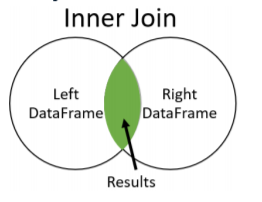

### One-to-many relationships

One-to-one relationship: Every row in the left table is related to only one row in the right table

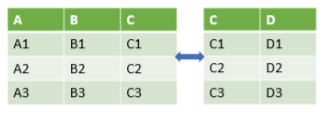

One-to-many relationship: every row in the left table is related to one or more rows in the right table

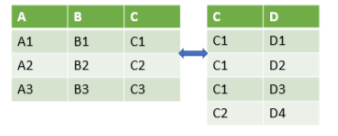

In [ ]:
#licenses data
licenses = pd.read_csv("Business_Licenses.csv")
print (licenses.head())
print (licenses.shape) #10.000, 6 - has the ward column

print (wards.shape) #50, 4

ward_licenses = ward.merge(licenses, on="ward", suffixes = ("_ward", "_lic"))
print (ward_licenses.head())
print (ward_licenses.shape) #10.000, 9

In [ ]:
#example to merge and count the dataframe rows

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on = "account")
# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})
# Sort the counted_df in desending order
sorted_df = counted_df.sort_values("account", ascending = False)
# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

### Merging multiple DataFrames

In [ ]:
#licenses table
#wards table
#grants data
grants = pd.read_csv("Small_Business_Grant_Agreements.csv")
print (grants.head())

#theoretical merge - generate lots of duplicated data
grants_licenses = grants.merge(licenses, on='zip')
print(grants_licenses.loc[grants_licenses['business']=="REGGIE'S BAR & GRILL",
                          ['grant','company','account','ward','business']])

#single merge - uses two data points to merge
grants.merge(license, on = ["address", "zip"])

#merging multiple tables - python reads the back slash \ as a one line of code
grants_licenses_ward = grants.merge(licenses, on =["address", "zip"]) \ 
                             .merge(wards, on = "ward", suffixes = ("_bus","_ward"))
grants_licenses_ward.head()

#Results
import matplotlib.pyplot as plt
grant_licenses_ward.groupby("ward").agg("sum").plot(kind = "bar", y = "grant")
plt.show()

#merging 3 tables
df1.merge(df2, on='col') \
  .merge(df3, on='col')

#merging 4 tables
df1.merge(df2, on='col') \
  .merge(df3, on='col') \
  .merge(df4, on='col') \


In [ ]:
# EXAMPLE to merge 3 datasets and sum a specific variable

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == "Weekday") 
                   & (ridership_cal_stations['station_name'] == "Wilson"))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

# EXAMPLE to merge 3 tables and print median income

# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = "zip") \
            			.merge(wards, on = "ward")

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby("alderman").agg({'income':'median'}))

#EXAMPLE - merge 3 datasets, groupby and sort

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(["vacant", "account", "pop_2010"], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

## Merging Tables With Different Join Types

### Left join

Use the ones from left table and join the right only for the match on the left table. Will always have more or equal observations than the inner join

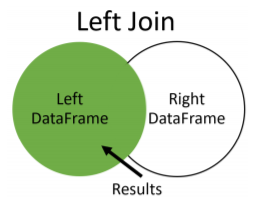

In [ ]:
#movies dataset
movies = pd.read_csv("tmdb_movies")
print (movies.head())
print (movies.shape) #4803,4

#tagline dataset
taglines = pd.read_csv("tmdb_taglines.csv")
print (taglnes.head())
print (taglines.shape) #3955,2

#merge with left join
movies_taglines = movies.merge(taglines, on = "id", how = "left") #default method of how is inner
print (movies_taglines.head())
print (movies_taglines.shape) #4805, 5 (for some reason not explained, it is different)

In [ ]:
# Full Example

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()
# Print the number of movies missing financials
print(number_of_missing_fin)

### Other joins

-Mirror opposite of the left join

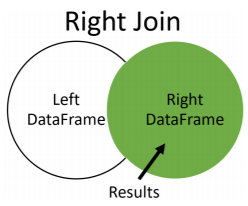

In [ ]:
#new data
movie_to_genres = pd.read_csv("tmdb_movie_to_genres.csv")
tv_gente = movie_to_genres[movie_to_genres["genre"] == "Tv Movie"]
print (tv_genre)

#filtering the data
m = movie_to_genres["genre"] == "TV Movie"
tv_genre = movie_to_genres[m]
print (tv_genre) #shows all movie_IDs from the TV Movie genre

#merge with right join (example with columns that have different names)
tv_movies = movies.merge(tv_genre, how = "right", left_on = "id", right_on = "movies_id")
print (tv_movies.head())

Brings all values, regardless of having a match or not

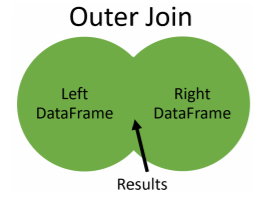

In [ ]:
#datasets for outer join
m = movie_to_genres["genre"] == "Family"
family = movie_to_genres[m].head(3)

m = movie_to_genres["genre"] == "Comedy"
comedy = movie_to_genres[m].head(3)

#merge with outer join
family_comedy = family.merge(comedy, on = "movie_id", how = "outer", suffixes = ("_fam", "_com"))
print (family_comedy)

In [ ]:
#full example

#EXAMPLE 1
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act','_sci'))
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = "id", right_on = "movie_id")
# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

#EXAMPLE 2
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on="movie_id", right_on = "id")
# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

#EXAMPLE 3 - actors that did not act in both movies# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on = "id", how = "outer", suffixes=("_1", "_2"))
# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull()))
# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())


### Merging a table to itself (self join)

Can be used to create a new sequence of the data. some common situations:
- hierarchical relationships (employee and manager)
- sequential relationships (logistics)
- graph data

In [ ]:
#sequel data (movie id that is a sequel to the original movie)
#using inner join
original_sequels = sequels.merge(sequels, left_on = "sequel", right_on = "id", suffixes =("_org", "_seq"))
print (original_sequels.head())
print (original_sequels[,["title_org", "title_seq"]].head()) #print first 5 from column title_org and title_seq

#using left join
original_sequels = sequels.merge(sequels, left_on = "sequel", right_on = "id", how = "left" suffixes =("_org", "_seq"))
print (original_sequels.head())
print (original_sequels[,["title_org", "title_seq"]].head()) #print first 5 from column title_org and title_seq

In [ ]:
#EXAMPLE

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

### Merging on indexes

In [ ]:
#setting an index if the table is a csv file
movies = pd.read_csv("tmdb_movies.csv", index_col = ["id"])
print (movies.head())

#merging on index - on id
movies_taglines = moavie.merge(taglines, on = "id", how = "left")
print (movies_taglines.head())

#MultiIndex datasets - both has a movie_id and cast_id indexes
#movies which samuel l jackson appeared
samuel = pd.read_csv("samuel.csv", index_col = ["movie_id", "cast_id"])
print (samuel.head())
#characters of different movies
casts = pd.read_csv("casts.csv", index_col = ["movie_id", "cast_id"])
print (casts.head())

#MultiIndex merge
samuel_casts = samuel.merge(casts, on = ["movie_id", "cast_id"])
print (samuel_casts.head())
print (samuel_casts.shape)

#Index merge with left_on and right_on (when indexes are different)
movie_genres = movies.merge(movie_to_genres, left_on = "id", left_index = True, right_on = "movie_id", right_index = True)
print (samuel_casts.head())

In [ ]:
#Full Example

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values("diff", ascending = False).head())

## Advanced Merging and Concatenating

### Filtering joins

Two joins types

- Mutuating joins: (we have seen so far): combines data from two tables based on matching observations in both tables
- Filtering joins: Filter observations from table based on wheter or not they match an observation in another table

Semi-joins:
- Returns the intersection, similar to an inner join
- Returns only columns from the left table ant not the right
- No duplicates (even with one to many)

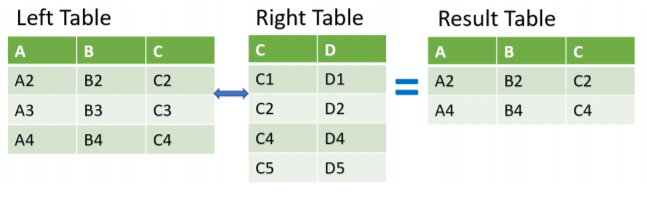

In [ ]:
#semi-join step by step
genres_tracks = genres.merge(top_tracks, on = "gid")
print (genres_tracks.head())

genres["gid"].isin(genres_tracks["gid"]) #provide the boolean telling if the genres.gid is inside the genres_tracks that we created

top_genres = genres[genres["gid"].isin(genres_tracks["gid"])] #to subset and remove the ones missing
print (top_genres.head())

Anti-join:
- Returns the observations in the left table that do not have a match on the right table
- Returns only comlumns from the left table and not the right

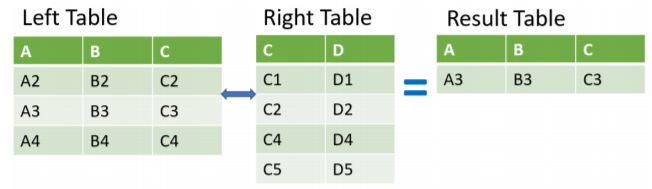

In [ ]:
#anti-join step by step
genres_tracks = genres.merge(top_tracks, on = "gid", how = "left", indicator = True) #indicator tells the source of each row, from the last column _merge
print (genres_tracks.head())

gid_list = genres_tracks.loc[genres_tracks["_merge"]=="left_only", "gid"] #locate TRUE left_only on gid
print (gid_list.head())

non_top_genres = genres[genres["gid"].isin(gid_list)]
print (non_top_genres.head())

### Concatenate DataFrames together vertically

Concatenate vertically means adding more columns to the dataframe
- Pandas .concat() method can concatenate both vertical and horizontal 
  - axis = 0, vertical
- Tables from different period of time can come from multiple tables
  - Same column names
  - Table variable names:
    - inv_jan (top)
    - inv_feb (middle)
    - inv_mar (bottom)

In [ ]:
#TABLES WITH SAME COLUMN NAMES
#basic concatenation
pd.concat([inv_jan, inv_feb, inv_mar])

#ignoring the index
pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=True)#sort the index (contraintuitive)

#setting labels to original tables - creates a multiindex, with the keys in the first level
pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=False, keys=['jan','feb','mar']) 

#TABLES WITH DIFFERENT COLUMN NAMES
#pd.concat already join different tables in the same dataframe
pd.concat([inv_jan, inv_feb], sort=True)

#inner argument will only select the same columns for both tables
pd.concat([inv_jan, inv_feb], join='inner')

In [ ]:
# FULL EXAMPLE
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=["7Jul", "8Aug", "9Sep"])
# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({"total": "mean"})
# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind = "bar")
plt.show()

.append():
- simplified .concat() method
- supports: ignore_index, and sort
- Does not support: keys and join
  - join is always set to outer


In [ ]:
#Append the tables
inv_jan.append([inv_feb, inv_mar], ignore_index=True, sort=True)

In [ ]:
#FULL EXAMPLE
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)
# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on = "tid", how = "inner")
# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({"quantity": "sum"})
# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values("quantity",ascending = False))

### Verifying integrity

Some issues that may appear when merging and concatenating:

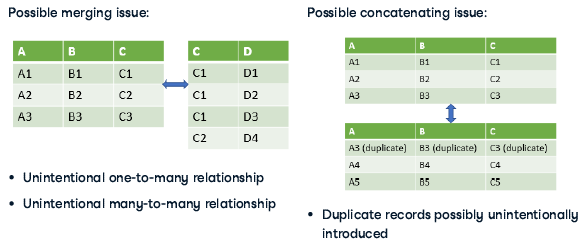

Validating merges:
- .merge(validate = None):
  - "one_to_one"
  - "one_to_many"
  - "many_to_one"
  - "many_to_many"

In [ ]:
#dataset tracks and specs (specs has two rows with tid = 2, causing one to many relationship)
#merge validate: one_to_one
tracks.merge(specs, on='tid', validate='one_to_one') #python gives a MergeError about the right dataset

#merge validate: one_to_many
albums.merge(tracks, on='aid', validate='one_to_many') #no error appear

Verifying concatenations:
- .concat(verify_integrity = False):
  - check if the new concatenated index contains duplicates
  - default value is False
  - True will check duplicate values in index values and erase errors

In [ ]:
#dataset inv_feb and inv_mar (both have a 9 on iid - create a duplicate, despite they are not the same)
#verifying concatenation = True: 
pd.concat([inv_feb, inv_mar], verify_integrity=True) #show that there is an overlapping
#verifying concatenation = False
pd.concat([inv_feb, inv_mar], verify_integrity=False) #duplicates the values

In [ ]:
#FULL EXAMPLE
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)
# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)
# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on = "tid", how = "inner")
# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]
# Print popular chart
print(popular_classic)

## Merging Ordered and Time Series Data

### Using merge_ordered()

Sort the result can be useful for ordered or time series data. There are some differences from the usual .merge:

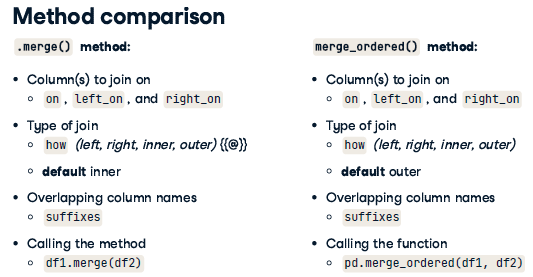

In [ ]:
#financial data set for the example:
  #two datasets of stock data: appl (for apple stock price) and mcd (mcdonalds)

#merging stock data
import pandas as pd
pd.merge_ordered(appl, mcd, on = "date", suffixes = ("_appl", "_mcd"))

#forward filling = filling missing data with previous value
pd.merge_ordered(appl, mcd, on = "date", suffixes = ("_appl", "_mcd"), fill_method = "ffill")

In [ ]:
#FULL EXAMPLE 1
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left',  fill_method='ffill')
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[["gdp", "returns"]]
# Print gdp_returns correlation
print (gdp_returns.corr())

#FULL EXAMPLE 2
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, how = "inner", on = "date")
# Print inflation_unemploy 
print (inflation_unemploy)
# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x = "unemployment_rate",y = "cpi", kind = "scatter")
plt.show()

### Using merge_asof()

- Simular to a merge_ordered() left join (also has similar features)
- Match on neares key column and not exact matches 
  - Merged "on" columns must be sorted
  - Uses less than or equal to logical
- É o procv com valor aproximado, e não exato
- When to use it
  - Data sampled from a process
  - Developing a training set (no data leakage)


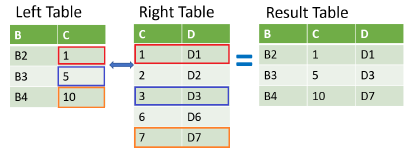

In [ ]:
#Datasets of companys and close value over data: visa (date and close) and ibm (date and close)

#merge_asof() example
pd.merge_asof(visa, ibm, on = "date_time", suffixes = ("_visa", "_ibm")) #visa has less data

#argument direction inverses the value that the merge will receive (forward and not backward)
pd.merge_asof(visa, ibm, on=['date_time'], suffixes=('_visa','_ibm'), direction='forward')

In [ ]:
#FULL EXAMPLE

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on = "date_time", suffixes = ("","_wells"), direction = "nearest")
# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = "date_time", suffixes = ("_jpm","_bac"), direction = "nearest")
# Compute price diff
price_diffs = jpm_wells_bac.diff()
# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=["close_jpm", "close_wells", "close_bac"])
plt.show()

#FULL EXAMPLE 2 - USES LIST COMPHREHENSION
#https://medium.com/data-hackers/aprenda-list-comprehension-7335844265bd

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on = "date")
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = [ "r" if s=='recession' else "g" for s in gdp_recession['econ_status']]
# Plot a bar chart of gdp_recession
gdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90)
plt.show()


### Selecting data with .query()

- .query("SOME SELECTION STATEMENT")
- Accepts an input string
  - Input string used to determine what rows are returned
  - Input string similar to statement after WHERE clause in SQL statement
    - Prior knowledge of SQL is not necessary

In [ ]:
#data table stocks

#Querying on a single condition
stocks.query("nike >=90") #returns 10 rows of data

#Querying on a multiple conditions, "and", "or"
stocks.query("nike >90 and disney <140") #returns 2 rows of data
stocks.query("nike >96 or disney <198") #returns 3 rows of data

#using .query() to select text
stocks_long.query('stock=="disney" or (stock=="nike" and close < 90)') #aspas possuem uma hierarquia

In [ ]:
#FULL EXAMPLE

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')
gdp_pivot

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date>="1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

### Reshaping data with .melt()

Data format can be of two types, wide and long:

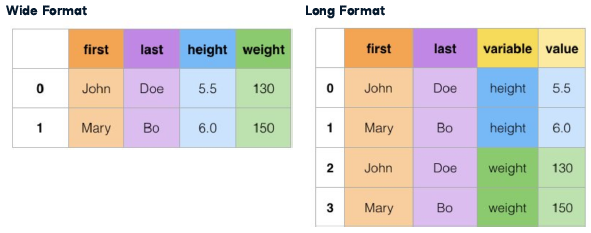

.melt() method enaples to unpivot and change the format of the dataset

In [ ]:
#twitter and facebook dataset, in which columns are different years of financials

#example of .melt()
social_fin_tall = social_fin.melt(id_vars=['financial','company']) #id_vars are the columns that we do not want to change
print(social_fin_tall.head(10)) #now it has a lot of data for each year 

#melting with value_vars
social_fin_tall = social_fin.melt(id_vars=['financial','company'],
                                  value_vars=['2018','2017']) #controls columns that are unpivot - do not have 2016 and 2019 anymore
print(social_fin_tall.head(9))

#Melting with column names
social_fin_tall = social_fin.melt(id_vars=['financial','company'],
                                  value_vars=['2018','2017'],
                                  var_name=['year'], #instead of "variable" column, it will become "year" column
                                  value_name='dollars') #instead of "value" column, it will become "dollars" column
print(social_fin_tall.head(8))

In [ ]:
#FULL EXAMPLE 1

# unpivot everything besides the year column (didn't need the value_vars argument)
ur_tall = ur_wide.melt(id_vars = "year", 
                       value_vars = ["jan", "feb", "mar", "apr", "may", "jun", 
                                     "jul", "aug", "sep", "oct", "nov", "dec"], 
                       var_name = "month", value_name = "unempl_rate")

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall["month"])
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values("date", ascending = True)
# Plot the unempl_rate by date
ur_sorted.plot(y = "unempl_rate", x = "date")
plt.show()

#FULL EXAMPLE 2
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars = "metric", var_name = "date", value_name = "close")
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric =='close'")
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on = "date", how = "inner", suffixes =( "_dow", "_bond"))
# Plot only the close_dow and close_bond columns
dow_bond.plot(y = ["close_dow","close_bond"], x='date', rot=90)
plt.show()